<a href="https://colab.research.google.com/github/ataulhaque/ML/blob/main/Spotify_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()

Saving spotify_sample.csv to spotify_sample.csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
#load the csv in spotify_sample dataframe
spotify_sample = pd.read_csv('spotify_sample.csv')

In [7]:
#select a single feature and target variable
X = spotify_sample[['acousticness']]
y = spotify_sample['energy']
#Split the data into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)


Mean Squared Error: 0.02645789680865205
R-squared: 0.30035665676933554


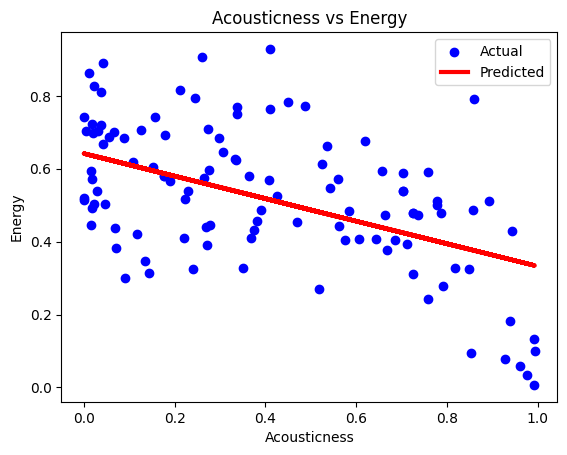

In [8]:
#create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

#make some predictions
y_pred = model.predict(X_test)

#evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R-squared:', r2)

#plotting the result
plt.scatter(X_test, y_test, color='blue', label='Actual');
plt.plot(X_test, y_pred, color='red', linewidth=3, label='Predicted');
plt.legend();
plt.title('Acousticness vs Energy');
plt.xlabel('Acousticness');
plt.ylabel('Energy');
plt.show();

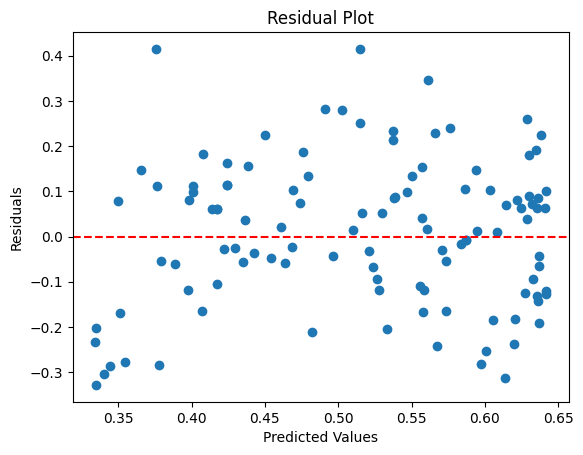

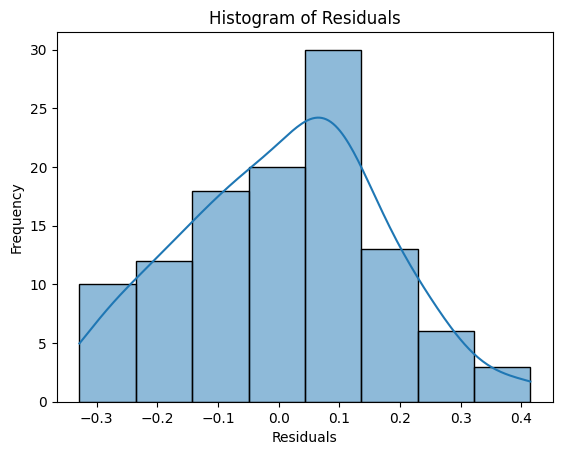

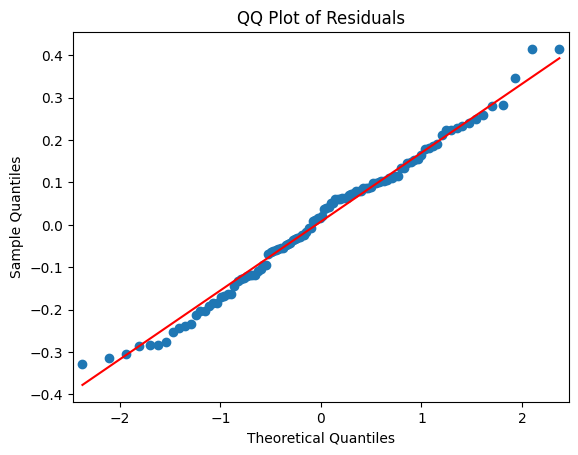

In [9]:
#check for homoscedasticity
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

#check for Normality of residuals
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

sm.qqplot(residuals, line='s')
plt.title('QQ Plot of Residuals')
plt.show()